# Vertical Profiles

**Last Updated: April 25, 2025**

**Load the necessary packages**

In [339]:
import os
import re
import glob
import numpy as np
import matplotlib.pyplot as plt

**Input & Output Directories**

In [340]:
BaseDir   = ('/Users/sukantabasu/Dropbox/Codes/LES/JAX-ALFA/JAXALFA0.1/')

CaseDir1   = os.path.join(BaseDir, 'examples/CBL_N91/runs/64x64x64/')
OutputDir1A = os.path.join(CaseDir1, 'output/') # double precision
OutputDir1B = os.path.join(CaseDir1, 'output_SP/') # single precision

CaseDir2   = os.path.join(BaseDir, 'examples/CBL_N91/runs/96x96x96/')
OutputDir2A = os.path.join(CaseDir2, 'output/') # double precision
OutputDir2B = os.path.join(CaseDir2, 'output_SP/') # single precision

CaseDir3   = os.path.join(BaseDir, 'examples/CBL_N91/runs/128x128x128/')
OutputDir3A = os.path.join(CaseDir3, 'output/') # double precision
OutputDir3B = os.path.join(CaseDir3, 'output_SP/') # single precision

**Input Information from the Config File**

In [341]:
# Simulation 1
nz_1 = 64 # number of grid points in z direction

# Simulation 2
nz_2 = 96 # number of grid points in z direction

# Simulation 3
nz_3 = 128 # number of grid points in z direction

# Common settings across the simulations
l_z = 5000 # domain height (m)
z_damping = 3300 # damping layer height (m)
SimTime = 3.5*3600  # total simulation time (sec)
OutputInterval = 60 # frequency of output (sec)

# Averaging window
T_start = 3*3600 # unit: sec
T_end = 3.5*3600 # unit: sec

**Derived Variables**

In [342]:
# Half levels for u, v, TH variables
z_1 = np.array([(k + 0.5) * l_z / (nz_1 - 1) for k in range(nz_1)])
z_2 = np.array([(k + 0.5) * l_z / (nz_2 - 1) for k in range(nz_2)])
z_3 = np.array([(k + 0.5) * l_z / (nz_3 - 1) for k in range(nz_3)])

# Full levels for fluxes
z_w_1 = np.array([(k) * l_z / (nz_1 - 1) for k in range(nz_1)])
z_w_2 = np.array([(k) * l_z / (nz_2 - 1) for k in range(nz_2)])
z_w_3 = np.array([(k) * l_z / (nz_3 - 1) for k in range(nz_3)])

# Averaging indices
T_start_index = int(T_start / OutputInterval) - 1
T_end_index = int(T_end / OutputInterval) - 1

**Function to Load Statistics & Perform Temporal Averaging**

In [343]:
def LoadStatsAverage(StatFiles, T_start_index, T_end_index):
    
    # Initialize lists
    TH  = []
    u2  = []
    v2  = []
    w2  = []
    TH2 = []
    uw  = []
    vw  = []
    wTH = []
    txy = []
    txz = []
    tyz = []
    qz = []
    
    # Process each file
    for file in StatFiles:
        with np.load(file) as data:
            TH.append(data['TH'])
            u2.append(data['u2'])
            v2.append(data['v2'])
            w2.append(data['w2'])
            TH2.append(data['TH2'])
            uw.append(data['uw'])
            vw.append(data['vw'])
            wTH.append(data['wTH'])
            txy.append(data['txy'])
            txz.append(data['txz'])
            tyz.append(data['tyz'])
            qz.append(data['qz'])
    
    # Convert lists to numpy arrays
    TH = np.array(TH)
    u2 = np.array(u2)
    v2 = np.array(v2)
    w2 = np.array(w2)
    TH2 = np.array(TH2)
    uw = np.array(uw)
    vw = np.array(vw)
    wTH = np.array(wTH)
    txy = np.array(txy)
    txz = np.array(txz)
    tyz = np.array(tyz)
    qz = np.array(qz)
    
    # Temporal averaging
    TH_avg  = np.mean(TH[T_start_index:T_end_index+1,:],axis=0)

    u2_avg  = np.mean(u2[T_start_index:T_end_index+1,:],axis=0)
    v2_avg  = np.mean(v2[T_start_index:T_end_index+1,:],axis=0)
    w2_avg  = np.mean(w2[T_start_index:T_end_index+1,:],axis=0)
    TH2_avg = np.mean(TH2[T_start_index:T_end_index+1,:],axis=0)
    
    uw_avg  = np.mean(uw[T_start_index:T_end_index+1,:],axis=0)
    vw_avg  = np.mean(vw[T_start_index:T_end_index+1,:],axis=0)
    wTH_avg = np.mean(wTH[T_start_index:T_end_index+1,:],axis=0)
    
    txy_avg = np.mean(txy[T_start_index:T_end_index+1,:],axis=0)
    txz_avg = np.mean(txz[T_start_index:T_end_index+1,:],axis=0)
    tyz_avg = np.mean(tyz[T_start_index:T_end_index+1,:],axis=0)
    qz_avg = np.mean(qz[T_start_index:T_end_index+1,:],axis=0)    
    
    return (TH_avg, 
            u2_avg, v2_avg, w2_avg, TH2_avg, 
            uw_avg, vw_avg, wTH_avg, 
            txy_avg, txz_avg, tyz_avg, qz_avg)

**Get All Statistics Files in Chronological Order**

In [344]:
OutputFiles1A = os.path.join(OutputDir1A, 'ALFA_Statistics_Iteration_*.npz')
StatFiles1A   = sorted(
    glob.glob(OutputFiles1A),
    key=lambda x: int(re.search(r'Iteration_(\d+)', x).group(1))
)

OutputFiles1B = os.path.join(OutputDir1B, 'ALFA_Statistics_Iteration_*.npz')
StatFiles1B   = sorted(
    glob.glob(OutputFiles1B),
    key=lambda x: int(re.search(r'Iteration_(\d+)', x).group(1))
)

OutputFiles2A = os.path.join(OutputDir2A, 'ALFA_Statistics_Iteration_*.npz')
StatFiles2A   = sorted(
    glob.glob(OutputFiles2A),
    key=lambda x: int(re.search(r'Iteration_(\d+)', x).group(1))
)

OutputFiles2B = os.path.join(OutputDir2B, 'ALFA_Statistics_Iteration_*.npz')
StatFiles2B   = sorted(
    glob.glob(OutputFiles2B),
    key=lambda x: int(re.search(r'Iteration_(\d+)', x).group(1))
)

OutputFiles3A = os.path.join(OutputDir3A, 'ALFA_Statistics_Iteration_*.npz')
StatFiles3A   = sorted(
    glob.glob(OutputFiles3A),
    key=lambda x: int(re.search(r'Iteration_(\d+)', x).group(1))
)

OutputFiles3B = os.path.join(OutputDir3B, 'ALFA_Statistics_Iteration_*.npz')
StatFiles3B   = sorted(
    glob.glob(OutputFiles3B),
    key=lambda x: int(re.search(r'Iteration_(\d+)', x).group(1))
)

**Extract Temporally Averaged Statistics**

In [345]:
(TH_avg_1A, 
 u2_avg_1A, v2_avg_1A, w2_avg_1A, TH2_avg_1A, 
 uw_avg_1A, vw_avg_1A, wTH_avg_1A,
 txy_avg_1A, txz_avg_1A, tyz_avg_1A, qz_avg_1A)\
    = LoadStatsAverage(StatFiles1A, T_start_index, T_end_index)

(TH_avg_1B, 
 u2_avg_1B, v2_avg_1B, w2_avg_1B, TH2_avg_1B, 
 uw_avg_1B, vw_avg_1B, wTH_avg_1B,
 txy_avg_1B, txz_avg_1B, tyz_avg_1B, qz_avg_1B)\
    = LoadStatsAverage(StatFiles1B, T_start_index, T_end_index)


(TH_avg_2A, 
 u2_avg_2A, v2_avg_2A, w2_avg_2A, TH2_avg_2A, 
 uw_avg_2A, vw_avg_2A, wTH_avg_2A,
 txy_avg_2A, txz_avg_2A, tyz_avg_2A, qz_avg_2A)\
    = LoadStatsAverage(StatFiles2A, T_start_index, T_end_index)


(TH_avg_2B, 
 u2_avg_2B, v2_avg_2B, w2_avg_2B, TH2_avg_2B, 
 uw_avg_2B, vw_avg_2B, wTH_avg_2B,
 txy_avg_2B, txz_avg_2B, tyz_avg_2B, qz_avg_2B)\
    = LoadStatsAverage(StatFiles2B, T_start_index, T_end_index)


(TH_avg_3A, 
 u2_avg_3A, v2_avg_3A, w2_avg_3A, TH2_avg_3A, 
 uw_avg_3A, vw_avg_3A, wTH_avg_3A,
 txy_avg_3A, txz_avg_3A, tyz_avg_3A, qz_avg_3A)\
    = LoadStatsAverage(StatFiles3A, T_start_index, T_end_index)


(TH_avg_3B, 
 u2_avg_3B, v2_avg_3B, w2_avg_3B, TH2_avg_3B, 
 uw_avg_3B, vw_avg_3B, wTH_avg_3B,
 txy_avg_3B, txz_avg_3B, tyz_avg_3B, qz_avg_3B)\
    = LoadStatsAverage(StatFiles3B, T_start_index, T_end_index)


**Plot the profiles**

In [346]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 14,
    "axes.labelsize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
})

In [347]:
def plot_profile(x, z, xlabel, ylabel=r"$z$ (m)", linestyle='-k', label=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 6))

    ax.plot(x, z, linestyle, linewidth=2, label=label)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(False)


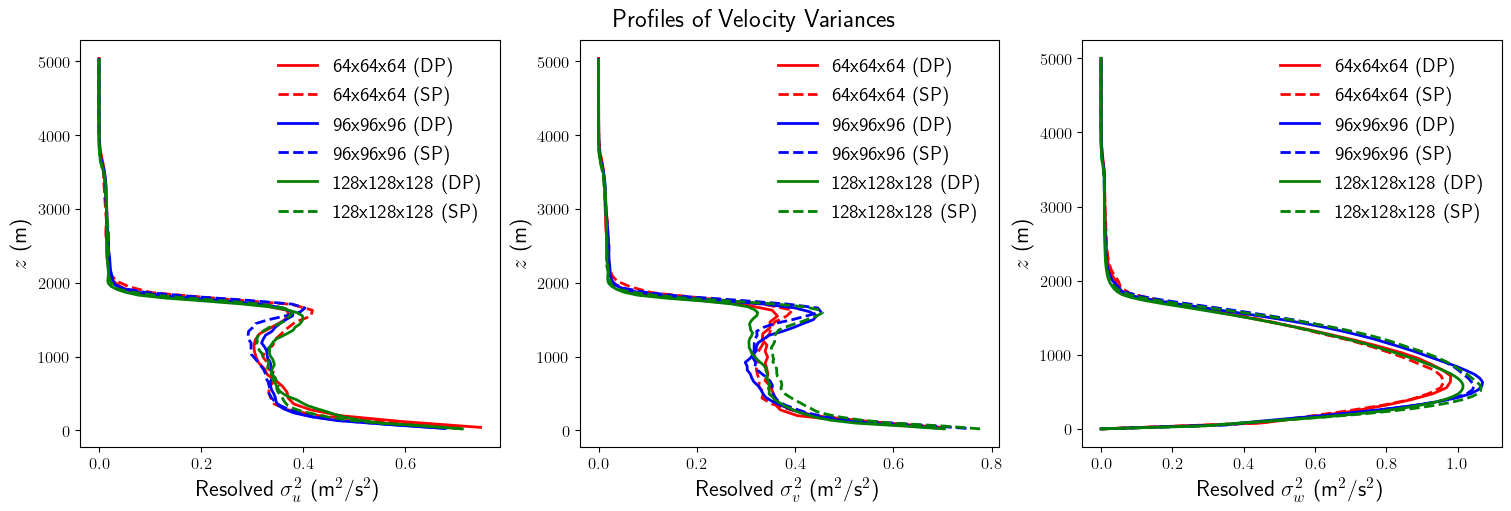

In [348]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

plot_profile(u2_avg_1A, z_1, xlabel=r"Resolved $\sigma_u^2$ (m$^2$/s$^2$)", 
             linestyle='-r', ax=axs[0], label = '64x64x64 (DP)')
plot_profile(u2_avg_1B, z_1, xlabel=r"Resolved $\sigma_u^2$ (m$^2$/s$^2$)", 
             linestyle='--r', ax=axs[0], label = '64x64x64 (SP)')
plot_profile(u2_avg_2A, z_2, xlabel=r"Resolved $\sigma_u^2$ (m$^2$/s$^2$)", 
             linestyle='-b', ax=axs[0], label = '96x96x96 (DP)')
plot_profile(u2_avg_2B, z_2, xlabel=r"Resolved $\sigma_u^2$ (m$^2$/s$^2$)", 
             linestyle='--b', ax=axs[0], label = '96x96x96 (SP)')
plot_profile(u2_avg_3A, z_3, xlabel=r"Resolved $\sigma_u^2$ (m$^2$/s$^2$)", 
             linestyle='-g', ax=axs[0], label = '128x128x128 (DP)')
plot_profile(u2_avg_3B, z_3, xlabel=r"Resolved $\sigma_u^2$ (m$^2$/s$^2$)", 
             linestyle='--g', ax=axs[0], label = '128x128x128 (SP)')
axs[0].legend(frameon=False)


plot_profile(v2_avg_1A, z_1, xlabel=r"Resolved $\sigma_v^2$ (m$^2$/s$^2$)", 
             linestyle='-r', ax=axs[1], label = '64x64x64 (DP)')
plot_profile(v2_avg_1B, z_1, xlabel=r"Resolved $\sigma_v^2$ (m$^2$/s$^2$)", 
             linestyle='--r', ax=axs[1], label = '64x64x64 (SP)')
plot_profile(v2_avg_2A, z_2, xlabel=r"Resolved $\sigma_v^2$ (m$^2$/s$^2$)", 
             linestyle='-b', ax=axs[1], label = '96x96x96 (DP)')
plot_profile(v2_avg_2B, z_2, xlabel=r"Resolved $\sigma_v^2$ (m$^2$/s$^2$)", 
             linestyle='--b', ax=axs[1], label = '96x96x96 (SP)')
plot_profile(v2_avg_3A, z_3, xlabel=r"Resolved $\sigma_v^2$ (m$^2$/s$^2$)", 
             linestyle='-g', ax=axs[1], label = '128x128x128 (DP)')
plot_profile(v2_avg_3B, z_3, xlabel=r"Resolved $\sigma_v^2$ (m$^2$/s$^2$)", 
             linestyle='--g', ax=axs[1], label = '128x128x128 (SP)')
axs[1].legend(frameon=False)


plot_profile(w2_avg_1A, z_w_1, xlabel=r"Resolved $\sigma_w^2$ (m$^2$/s$^2$)", 
             linestyle='-r', ax=axs[2], label = '64x64x64 (DP)')
plot_profile(w2_avg_1B, z_w_1, xlabel=r"Resolved $\sigma_w^2$ (m$^2$/s$^2$)", 
             linestyle='--r', ax=axs[2], label = '64x64x64 (SP)')
plot_profile(w2_avg_2A, z_w_2, xlabel=r"Resolved $\sigma_w^2$ (m$^2$/s$^2$)", 
             linestyle='-b', ax=axs[2], label = '96x96x96 (DP)')
plot_profile(w2_avg_2B, z_w_2, xlabel=r"Resolved $\sigma_w^2$ (m$^2$/s$^2$)", 
             linestyle='--b', ax=axs[2], label = '96x96x96 (SP)')
plot_profile(w2_avg_3A, z_w_3, xlabel=r"Resolved $\sigma_w^2$ (m$^2$/s$^2$)", 
             linestyle='-g', ax=axs[2], label = '128x128x128 (DP)')
plot_profile(w2_avg_3B, z_w_3, xlabel=r"Resolved $\sigma_w^2$ (m$^2$/s$^2$)", 
             linestyle='--g', ax=axs[2], label = '128x128x128 (SP)')
axs[2].legend(frameon=False)

fig.suptitle("Profiles of Velocity Variances", fontsize=18)
plt.show()

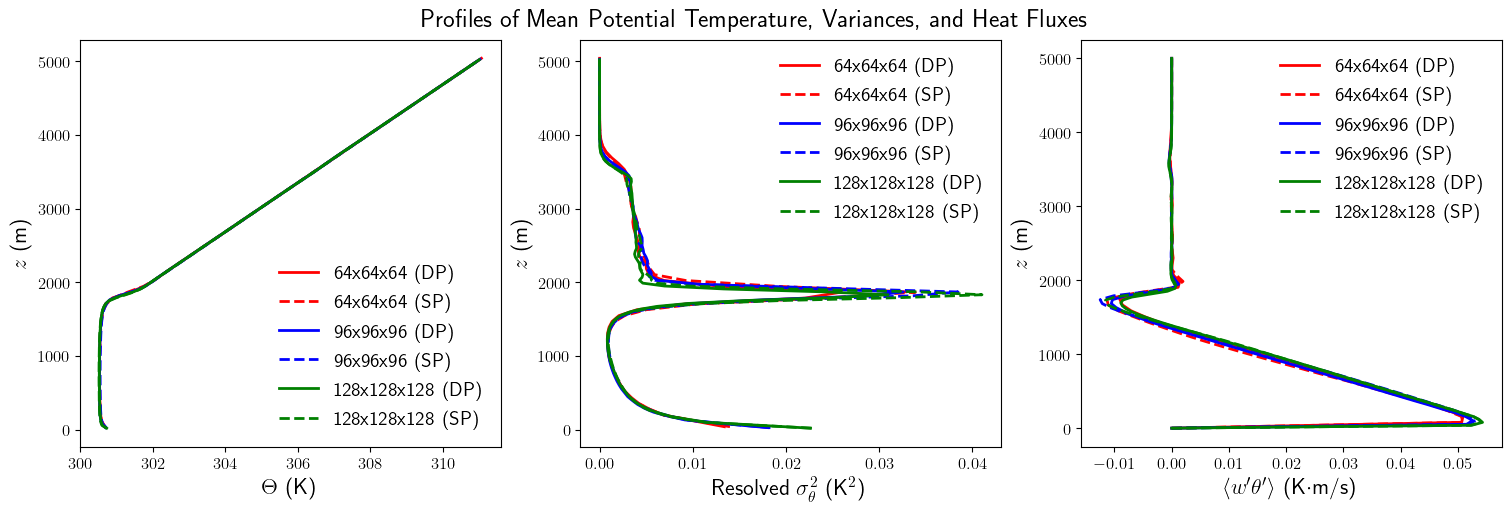

In [349]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

plot_profile(TH_avg_1A, z_1, xlabel=r"$\Theta$ (K)", linestyle='-r', 
             ax=axs[0], label = '64x64x64 (DP)')
plot_profile(TH_avg_1B, z_1, xlabel=r"$\Theta$ (K)", linestyle='--r', 
             ax=axs[0], label = '64x64x64 (SP)')
plot_profile(TH_avg_2A, z_2, xlabel=r"$\Theta$ (K)", linestyle='-b', 
             ax=axs[0], label = '96x96x96 (DP)')
plot_profile(TH_avg_2B, z_2, xlabel=r"$\Theta$ (K)", linestyle='--b', 
             ax=axs[0], label = '96x96x96 (SP)')
plot_profile(TH_avg_3A, z_3, xlabel=r"$\Theta$ (K)", linestyle='-g', 
             ax=axs[0], label = '128x128x128 (DP)')
plot_profile(TH_avg_3B, z_3, xlabel=r"$\Theta$ (K)", linestyle='--g', 
             ax=axs[0], label = '128x128x128 (SP)')
axs[0].legend(frameon=False)


plot_profile(TH2_avg_1A, z_1, xlabel=r"Resolved $\sigma_\theta^2$ (K$^2$)", 
             linestyle='-r', ax=axs[1], label = '64x64x64 (DP)')
plot_profile(TH2_avg_1B, z_1, xlabel=r"Resolved $\sigma_\theta^2$ (K$^2$)", 
             linestyle='--r', ax=axs[1], label = '64x64x64 (SP)')
plot_profile(TH2_avg_2A, z_2, xlabel=r"Resolved $\sigma_\theta^2$ (K$^2$)", 
             linestyle='-b', ax=axs[1], label = '96x96x96 (DP)')
plot_profile(TH2_avg_2B, z_2, xlabel=r"Resolved $\sigma_\theta^2$ (K$^2$)", 
             linestyle='--b', ax=axs[1], label = '96x96x96 (SP)')
plot_profile(TH2_avg_3A, z_3, xlabel=r"Resolved $\sigma_\theta^2$ (K$^2$)", 
             linestyle='-g', ax=axs[1], label = '128x128x128 (DP)')
plot_profile(TH2_avg_3B, z_3, xlabel=r"Resolved $\sigma_\theta^2$ (K$^2$)", 
             linestyle='--g', ax=axs[1], label = '128x128x128 (SP)')
axs[1].legend(frameon=False)


plot_profile(wTH_avg_1A, z_w_1, 
             xlabel=r"$\langle w'\theta'\rangle$ (K$\cdot$m/s)", 
             linestyle='-r', ax=axs[2], label = '64x64x64 (DP)')
plot_profile(wTH_avg_1B, z_w_1, 
             xlabel=r"$\langle w'\theta'\rangle$ (K$\cdot$m/s)", 
             linestyle='--r', ax=axs[2], label = '64x64x64 (SP)')
plot_profile(wTH_avg_2A, z_w_2, 
             xlabel=r"$\langle w'\theta'\rangle$ (K$\cdot$m/s)", 
             linestyle='-b', ax=axs[2], label = '96x96x96 (DP)')
plot_profile(wTH_avg_2B, z_w_2, 
             xlabel=r"$\langle w'\theta'\rangle$ (K$\cdot$m/s)", 
             linestyle='--b', ax=axs[2], label = '96x96x96 (SP)')
plot_profile(wTH_avg_3A, z_w_3, 
             xlabel=r"$\langle w'\theta'\rangle$ (K$\cdot$m/s)", 
             linestyle='-g', ax=axs[2], label = '128x128x128 (DP)')
plot_profile(wTH_avg_3B, z_w_3, 
             xlabel=r"$\langle w'\theta'\rangle$ (K$\cdot$m/s)", 
             linestyle='--g', ax=axs[2], label = '128x128x128 (SP)')
axs[2].legend(frameon=False)

fig.suptitle("Profiles of Mean Potential Temperature, Variances, and Heat Fluxes", fontsize=18)
plt.show()

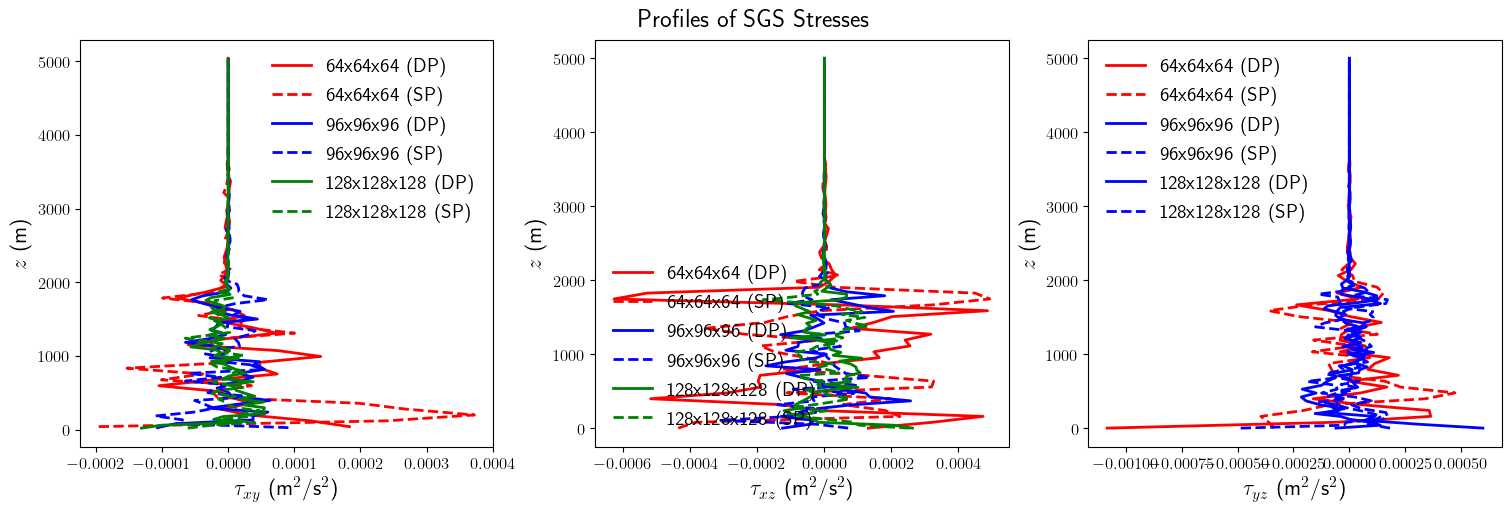

In [350]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

plot_profile(txy_avg_1A, z_1, xlabel=r"$\tau_{xy}$ (m$^2$/s$^2$)", 
             linestyle='-r', ax=axs[0], label = '64x64x64 (DP)')
plot_profile(txy_avg_1B, z_1, xlabel=r"$\tau_{xy}$ (m$^2$/s$^2$)", 
             linestyle='--r', ax=axs[0], label = '64x64x64 (SP)')
plot_profile(txy_avg_2A, z_2, xlabel=r"$\tau_{xy}$ (m$^2$/s$^2$)", 
             linestyle='-b', ax=axs[0], label = '96x96x96 (DP)')
plot_profile(txy_avg_2B, z_2, xlabel=r"$\tau_{xy}$ (m$^2$/s$^2$)", 
             linestyle='--b', ax=axs[0], label = '96x96x96 (SP)')
plot_profile(txy_avg_3A, z_3, xlabel=r"$\tau_{xy}$ (m$^2$/s$^2$)", 
             linestyle='-g', ax=axs[0], label = '128x128x128 (DP)')
plot_profile(txy_avg_3B, z_3, xlabel=r"$\tau_{xy}$ (m$^2$/s$^2$)", 
             linestyle='--g', ax=axs[0], label = '128x128x128 (SP)')
axs[0].legend(frameon=False)


plot_profile(txz_avg_1A, z_w_1, xlabel=r"$\tau_{xz}$ (m$^2$/s$^2$)", 
             linestyle='-r', ax=axs[1], label = '64x64x64 (DP)')
plot_profile(txz_avg_1B, z_w_1, xlabel=r"$\tau_{xz}$ (m$^2$/s$^2$)", 
             linestyle='--r', ax=axs[1], label = '64x64x64 (SP)')
plot_profile(txz_avg_2A, z_w_2, xlabel=r"$\tau_{xz}$ (m$^2$/s$^2$)",
            linestyle='-b', ax=axs[1], label = '96x96x96 (DP)')
plot_profile(txz_avg_2B, z_w_2, xlabel=r"$\tau_{xz}$ (m$^2$/s$^2$)",
            linestyle='--b', ax=axs[1], label = '96x96x96 (SP)')
plot_profile(txz_avg_3A, z_w_3, xlabel=r"$\tau_{xz}$ (m$^2$/s$^2$)",
            linestyle='-g', ax=axs[1], label = '128x128x128 (DP)')
plot_profile(txz_avg_3B, z_w_3, xlabel=r"$\tau_{xz}$ (m$^2$/s$^2$)",
            linestyle='--g', ax=axs[1], label = '128x128x128 (SP)')
axs[1].legend(frameon=False)


plot_profile(tyz_avg_1A, z_w_1, xlabel=r"$\tau_{yz}$ (m$^2$/s$^2$)", 
             linestyle='-r', ax=axs[2], label = '64x64x64 (DP)')
plot_profile(tyz_avg_1B, z_w_1, xlabel=r"$\tau_{yz}$ (m$^2$/s$^2$)", 
             linestyle='--r', ax=axs[2], label = '64x64x64 (SP)')
plot_profile(tyz_avg_2A, z_w_2, xlabel=r"$\tau_{yz}$ (m$^2$/s$^2$)", 
            linestyle='-b', ax=axs[2], label = '96x96x96 (DP)')
plot_profile(tyz_avg_2B, z_w_2, xlabel=r"$\tau_{yz}$ (m$^2$/s$^2$)", 
            linestyle='--b', ax=axs[2], label = '96x96x96 (SP)')
plot_profile(tyz_avg_3A, z_w_3, xlabel=r"$\tau_{yz}$ (m$^2$/s$^2$)", 
            linestyle='-b', ax=axs[2], label = '128x128x128 (DP)')
plot_profile(tyz_avg_3B, z_w_3, xlabel=r"$\tau_{yz}$ (m$^2$/s$^2$)", 
            linestyle='--b', ax=axs[2], label = '128x128x128 (SP)')
axs[2].legend(frameon=False)

fig.suptitle("Profiles of SGS Stresses", fontsize=18)
plt.show()

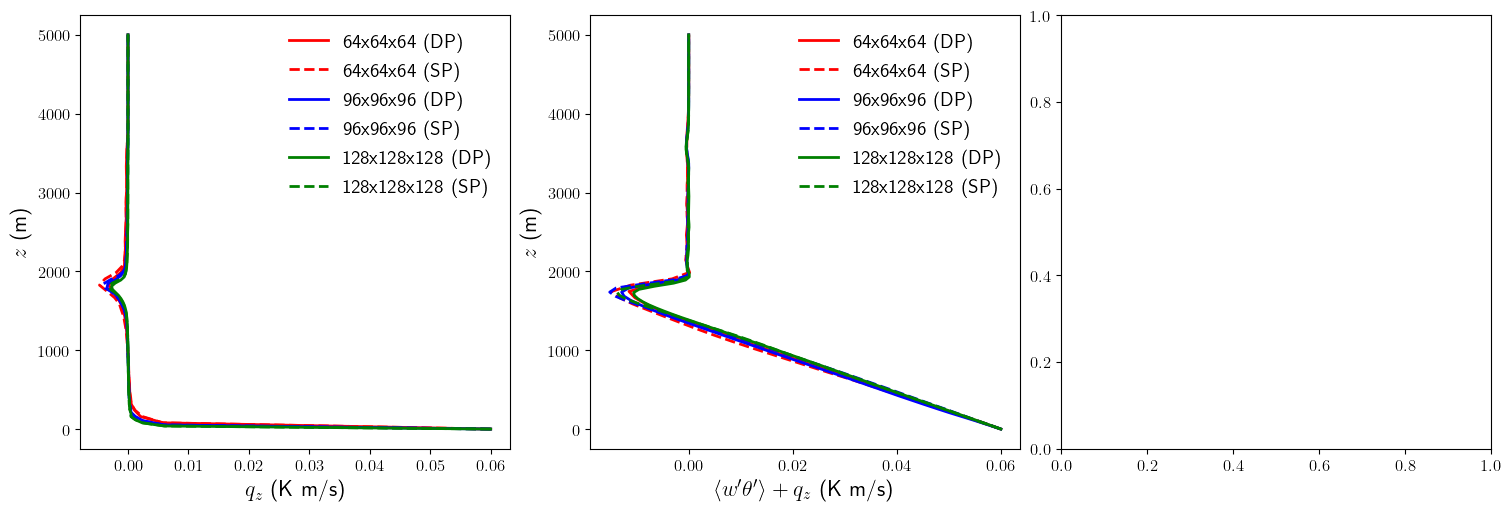

In [351]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

plot_profile(qz_avg_1A, z_w_1, xlabel=r"$q_z$ (K m/s)", 
             linestyle='-r', ax=axs[0], label = '64x64x64 (DP)')
plot_profile(qz_avg_1B, z_w_1, xlabel=r"$q_z$ (K m/s)", 
             linestyle='--r', ax=axs[0], label = '64x64x64 (SP)')
plot_profile(qz_avg_2A, z_w_2, xlabel=r"$q_z$ (K m/s)", 
             linestyle='-b', ax=axs[0], label = '96x96x96 (DP)')
plot_profile(qz_avg_2B, z_w_2, xlabel=r"$q_z$ (K m/s)", 
             linestyle='--b', ax=axs[0], label = '96x96x96 (SP)')
plot_profile(qz_avg_3A, z_w_3, xlabel=r"$q_z$ (K m/s)", 
             linestyle='-g', ax=axs[0], label = '128x128x128 (DP)')
plot_profile(qz_avg_3B, z_w_3, xlabel=r"$q_z$ (K m/s)", 
             linestyle='--g', ax=axs[0], label = '128x128x128 (SP)')
axs[0].legend(frameon=False)


plot_profile(qz_avg_1A + wTH_avg_1A, z_w_1, 
             xlabel=r"$\langle "r"w'\theta'\rangle + q_z$ (K m/s)", 
             linestyle='-r', ax=axs[1], label = '64x64x64 (DP)')
plot_profile(qz_avg_1B + wTH_avg_1B, z_w_1, 
             xlabel=r"$\langle "r"w'\theta'\rangle + q_z$ (K m/s)", 
             linestyle='--r', ax=axs[1], label = '64x64x64 (SP)')
plot_profile(qz_avg_2A + wTH_avg_2A, z_w_2, 
             xlabel=r"$\langle "r"w'\theta'\rangle + q_z$ (K m/s)", 
             linestyle='-b', ax=axs[1], label = '96x96x96 (DP)')
plot_profile(qz_avg_2B + wTH_avg_2B, z_w_2, 
             xlabel=r"$\langle "r"w'\theta'\rangle + q_z$ (K m/s)", 
             linestyle='--b', ax=axs[1], label = '96x96x96 (SP)')
plot_profile(qz_avg_3A + wTH_avg_3A, z_w_3, 
             xlabel=r"$\langle "r"w'\theta'\rangle + q_z$ (K m/s)", 
             linestyle='-g', ax=axs[1], label = '128x128x128 (DP)')
plot_profile(qz_avg_3B + wTH_avg_3B, z_w_3, 
             xlabel=r"$\langle "r"w'\theta'\rangle + q_z$ (K m/s)", 
             linestyle='--g', ax=axs[1], label = '128x128x128 (SP)')
axs[1].legend(frameon=False)
